In [1]:
import pandas as pd
import matplotlib.pyplot as pplt
from matplotlib import numpy as np
from collections import Counter

df = pd.read_csv("Latin_Cultural_Organizations_20231110.csv")

df.head()

# imported a couple things and set df (meaning dataframe)

,Business Organization,Business Type Other,Company Name,Company Description,Organization Location,Street Address,Apt Number,Borough,Postcode,Business Phone,...,Contact Fax,Location,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,Cultural Center,NaN,DreamYard Drama Project,DreamYard is committed to helping transform Br...,DreamYard Drama Project,872 Gerard Ave.,#2,Bronx,10452,NaN,...,NaN,"872 Gerard Ave\nBronx, NY 10452\n(40.827708359...",40.827784,-73.924766,4.0,8.0,195.0,2097166.0,2.024760e+09,West Concourse ...
1,Cultural Center,NaN,ABC No Rio,ABC No Rio is a collectively-run center for ar...,ABC No Rio,156 Rivington Street,NaN,Manhattan,10009,NaN,...,NaN,"156 Rivington Street\nManhattan, NY 10009\n(40...",40.719206,-73.985447,3.0,1.0,3001.0,1083425.0,1.003490e+09,Chinatown ...
2,Theater,NaN,The Puerto Rican Traveling Theatre,The mission of the Puerto Rican Traveling Thea...,The Puerto Rican Traveling Theatre,304 West 47th. Street,NaN,Manhattan,10036,NaN,...,NaN,"304 47th Street\nManhattan, NY 10036\n(40.7604...",40.760614,-73.987987,4.0,3.0,127.0,1025057.0,1.010370e+09,Clinton ...
3,Cultural Center,NaN,Casa De La Herencia Cultural Puertorriquena,La Casa de la Herencia Cultural Puertorriquena...,Casa De La Herencia Cultural Puertorriquena,1230 5th Ave.,Suite 458,Manhattan,10029,NaN,...,NaN,"1230 5th Ave\nManhattan, NY 10029\n(40.7932767...",40.793072,-73.951992,11.0,8.0,168.0,1051499.0,1.016100e+09,East Harlem South ...
4,Cultural Center,NaN,"Puerto Rican Workshop, Inc.","Taller Boricua was established in 1970, in New...","Puerto Rican Workshop, Inc.",1680 Lexington Avenue,NaN,Manhattan,10029,NaN,...,NaN,"1680 Lexington Avenue\nManhattan, NY 10029\n(4...",40.791881,-73.946558,11.0,8.0,172.0,1051991.0,1.016330e+09,East Harlem South ...


# How do the distribution of Latin Cultural organizations acrosse the boroughs indicate the areas that they may be in more demand?

In [27]:
Counter(df["NTA"])

# testing for possible data to anaylyze using counter function

Counter({'East Harlem South                                                          ': 9,
         nan: 8,
         'Midtown-Midtown South                                                      ': 7,
         'Clinton                                                                    ': 6,
         'Lower East Side                                                            ': 6,
         'Hunts Point                                                                ': 4,
         'Upper East Side-Carnegie Hill                                              ': 4,
         'West Concourse                                                             ': 3,
         'West Village                                                               ': 3,
         'Upper West Side                                                            ': 3,
         'Battery Park City-Lower Manhattan                                          ': 2,
         'East Village                                                   

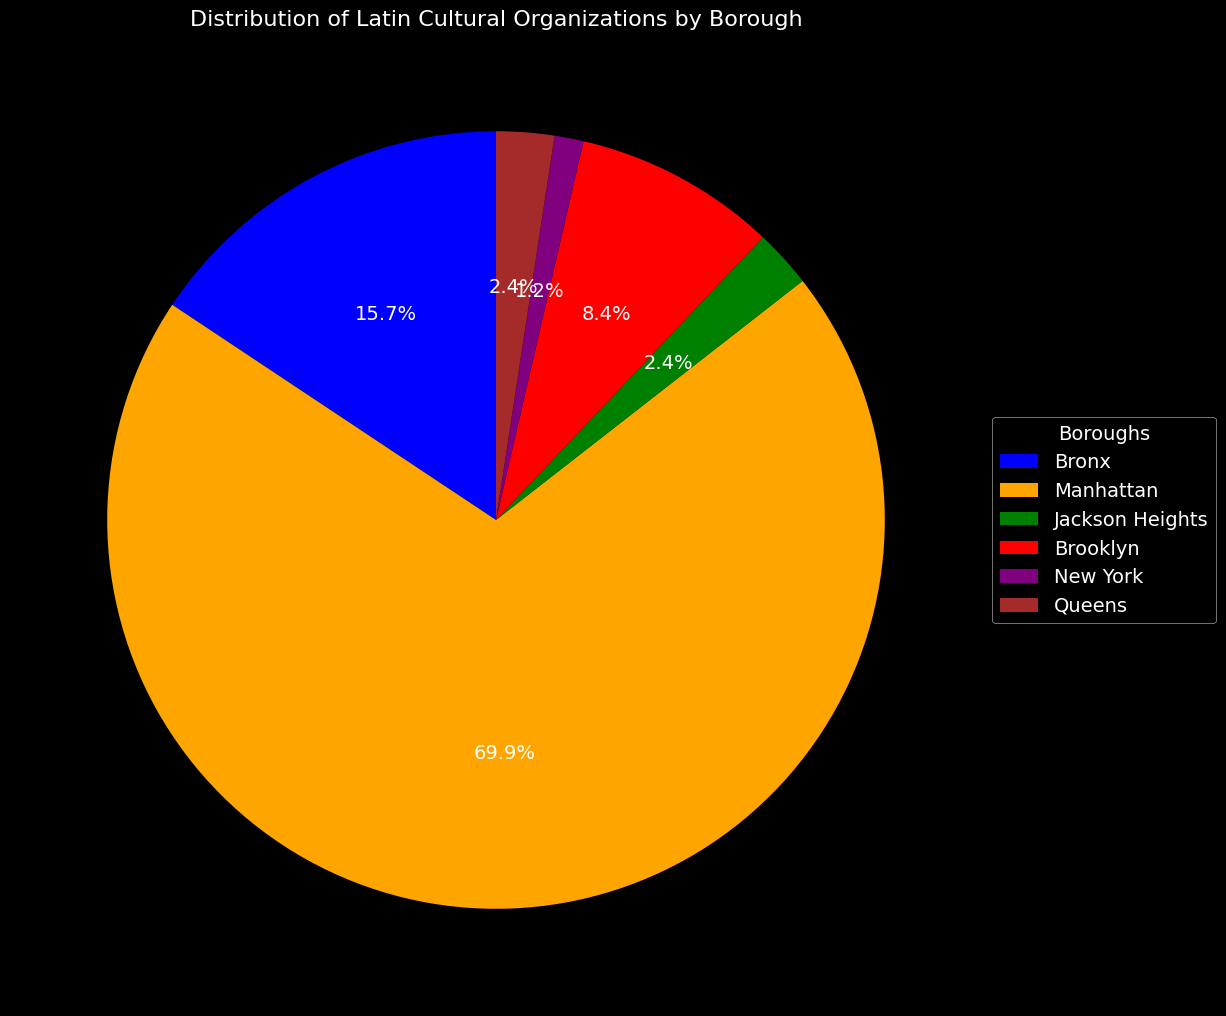

In [26]:
df.head()
# Set the 'Solarize_Light2' style
pplt.style.use('dark_background')

# Count the total amount of Latin Cultural Organizations by borough
latin_org_count = Counter(df["Borough"])

# Specify names and corresponding values for the plot
boroughs = list(latin_org_count.keys())
org_counts = list(latin_org_count.values())

# Create a pie chart
fig, ax = pplt.subplots(figsize=(27, 12))
wedges, texts, autotexts = ax.pie(org_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])

# Adding legends for each borough
ax.legend(wedges, boroughs, title='Boroughs', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Setting the title for the plot (optional, you can remove this line)
pplt.title('Distribution of Latin Cultural Organizations by Borough')

# Display the pie chart
pplt.show()

# Graph 1 Analysis Markdown

The first question I posed to myself to answer using the data given in the Latin Cultural Organiztions data set was "How do the distribution of Latin Cultural organizations acrosse the boroughs indicate the areas that they may be in more demand?". 

Coming up with the idea of a graph that uses the counter function of the amount of organiztions in each borough allows for me to create a bar graph that represents exactly this. 

This graph demonstrates that Manhattan clearly has the most amount of Latin Cultural Organizations by a long shot, even when compared to the borough with the 2nd most organizations being the Bronx (Manhattan: 58, Bronx: 13). 

This can indicate that in the boroughs of Manhattan and The Bronx, Latin culture receives ample support from organizations like this whereas in places like Queens and Jackson Heights, there are only 2 Latin Culture Organizations so that could imply that theres more of a need for this kind of Latin Culutre outreach in areas like these.

# How does are the amount of Latin culutural organizations distributed based on neighborhood tabulation areas (NTA)?

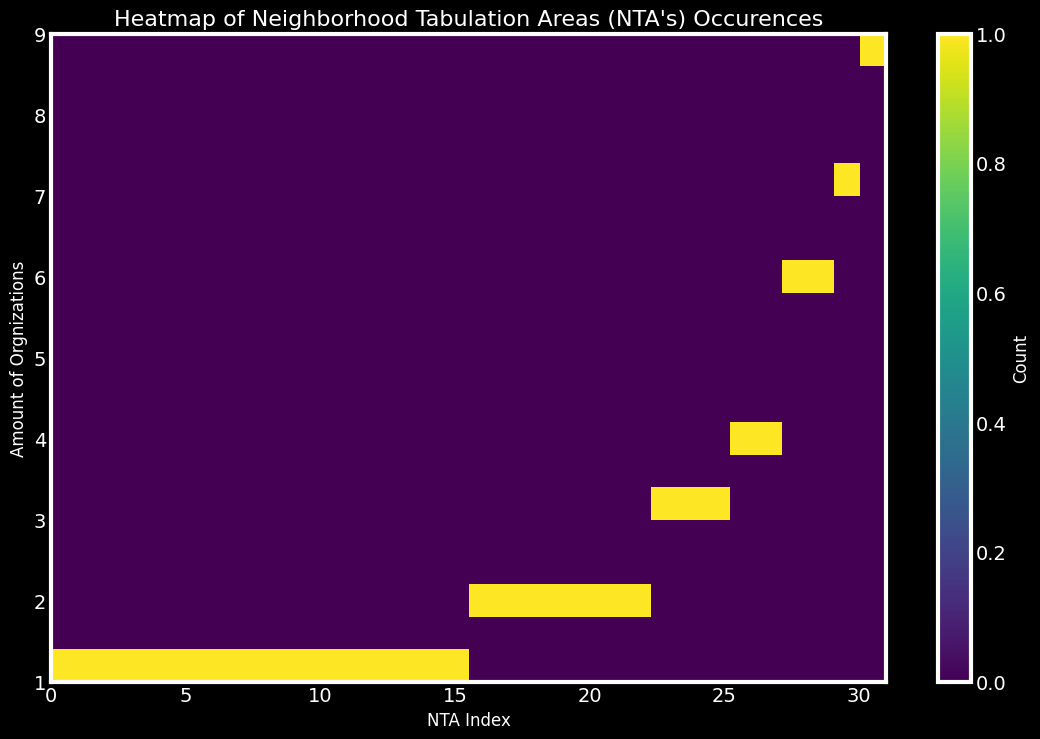

In [47]:
# Grouping by "NTA" and calculating the count
nta_counts = df.groupby("NTA").size()

# Resetting the index to make "NTA" a regular column
nta_counts = nta_counts.reset_index(name='Count')

# Sorting the DataFrame by count in descending order
nta_counts = nta_counts.sort_values(by='Count', ascending=True)

# Creating a 2D histogram using matplotlib
pplt.figure(figsize=(12, 8))
pplt.hist2d(range(len(nta_counts)), nta_counts['Count'], bins=[len(nta_counts), 20], cmap='viridis')

# Adding color bar
cbar = pplt.colorbar(label='Count')

# Setting the title and labels for the plot
pplt.title("Heatmap of Neighborhood Tabulation Areas (NTA's) Occurences")
pplt.xlabel('NTA Index')
pplt.ylabel('Amount of Orgnizations')

# Display the 2D histogram
pplt.show()

# Graph 2 Analysis Markdown

The 2nd question I posed to myself to answer using the data given in the Latin Cultural Organiztions data set was "How does are the amount of Latin culutural organizations distributed based on neighborhood tabulation areas (NTA)?"

Looking at the outliers of the heatmap graph representing areas that have Latin cultural organizations, you can see that there are about 11 neighborhood areas in NY that have more than 3 Latin cultural organizations within them. These outliers can indicate that theres is either very great support for Latin american's in those areas, or, theres an influx of latin american reisdents and that these Latin cultural organizations are in great demand.

On the other hand, there are as many as 22 neigborhoods in NY that have less than 2 Latin culutral organiztions. On contrary to the outliers of the graph, the information presented about these 22 neigborhoods can indicate that the support for Latin american's in those areas is likely lower than it should be and/or there is not much demand for it.